In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("C:/Users/TFG155/Desktop/인공지능개론/중간고사 데이터/car.data",index_col = None, header=None)
dataset

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [2]:
dataset.dropna(axis=1)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
dataset.shape

(1728, 7)

Text(0.5, 1.0, 'Label')

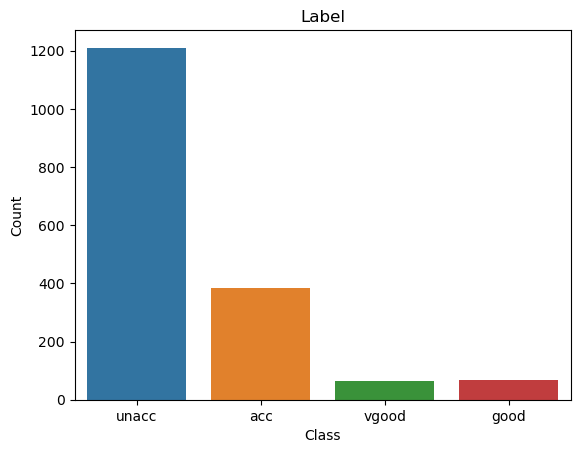

In [4]:
sns.countplot(x = dataset[6])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Label")

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in dataset.columns:
    dataset[i] = le.fit_transform(dataset[i])

X =dataset.iloc[:, [0,1,2,3,4,5]].values
y =dataset.loc[:, 6]

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [7]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [8]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import SGD,Adam


model = Sequential()

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(6, 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             192       
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                16050     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 16,293
Trainable params: 16,293
Non-trainable params: 0
_________________________________________________________________


In [14]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
44/44 [==============================] - 1s 5ms/step - loss: 0.1953 - mse: 0.1953 - val_loss: 0.1898 - val_mse: 0.1898
Epoch 2/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1911 - mse: 0.1911 - val_loss: 0.1889 - val_mse: 0.1889
Epoch 3/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1898 - mse: 0.1898 - val_loss: 0.1918 - val_mse: 0.1918
Epoch 4/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1892 - mse: 0.1892 - val_loss: 0.1882 - val_mse: 0.1882
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1888 - mse: 0.1888 - val_loss: 0.1883 - val_mse: 0.1883
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1884 - mse: 0.1884 - val_loss: 0.1887 - val_mse: 0.1887
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1883 - mse: 0.1883 - val_loss: 0.1877 - val_mse: 0.1877
Epoch 8/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1882 - m

In [15]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 2ms/step - loss: 0.1875 - mse: 0.1875


[0.18750883638858795, 0.18750883638858795]